<a href="https://colab.research.google.com/github/siva-sankar-a/eva/blob/master/S9/assignment/Quiz9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S9 _Assignment 9_

  | Summary of overall targets |  |
  | - | - |
  | _Dataset_| **CIFAR10** |
  | _Max. number of epochs_| **NA** |
  | _Max. number of parameters_| **NA** |
  | _Architecture_| **Resnet18** |
  | _Target accurracy_| **87%** |


# Implementation

## Initialization

### Mounting google drive to save results

In [2]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-22 00:33:39.951171


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!pip install torchsummary
!pip install torchviz
!pip install albumentations

In [1]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import torch
import torchvision
import numpy as np
import pandas as pd
import cv2

from __future__ import print_function        # Import for print statement
import torch                                 # Import pytorch library
import torch.nn as nn                        # Import neural net module from pytorch
import torch.nn.functional as F              # Import functional interface from pytorch
import torch.optim as optim                  # Import optimizer module from pytorch

from torchvision import datasets, transforms # Import datasets and augmentation functionality from vision module within pytorch
from torchsummary import summary             # Import summary with pytorch
from torchviz import make_dot

from torch.utils.tensorboard import SummaryWriter
from torch.autograd import Variable

import matplotlib.pyplot as plt
import tensorflow as tf

from tqdm import tqdm

from torch.optim.lr_scheduler import StepLR

In [3]:
!rm -rf eva
!git clone "https://github.com/siva-sankar-a/eva.git"

Cloning into 'eva'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 341 (delta 22), reused 31 (delta 10), pack-reused 291
Receiving objects: 100% (341/341), 4.89 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [0]:
%load_ext autoreload
%autoreload 2
from eva.S9.api import Experiment
from eva.S9.data_manager.data_manager_albumentations import  DataManager
from eva.S9.viz import viz_cifar10_grid_
from eva.S9.utils import textual_summary_cifar10, graphical_summary_cifar10
from eva.S9.settings import cifar10_classes
from eva.S9.models.model_s9 import ResNet, ResNet18
from eva.S9.grad_cam.grad_cam import GradCam
from eva.S9.assignment.QuizDNN import Net

### Create an instance of experiment class

In [5]:
experiment = Experiment(name=f'default', dataset_name='cifar10')

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified




```
x1 = Input
x2 = Conv(x1)
x3 = Conv(x1 + x2)
x4 = MaxPooling(x1 + x2 + x3)
x5 = Conv(x4)
x6 = Conv(x4 + x5)
x7 = Conv(x4 + x5 + x6)
x8 = MaxPooling(x5 + x6 + x7)
x9 = Conv(x8)
x10 = Conv (x8 + x9)
x11 = Conv (x8 + x9 + x10)
x12 = GAP(x11)
x13 = FC(x12)
```

In [0]:
experiment.model = Net().to(experiment.device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird   cat   car   cat


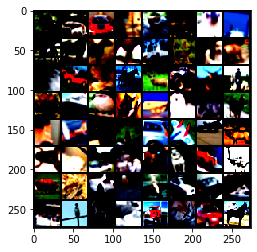

In [7]:
viz_cifar10_grid_(experiment.data_manager.train_loader)

In [11]:
summary(experiment.model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,456
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]         147,456
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]         147,456
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
          Dropout-14          [-1, 128,

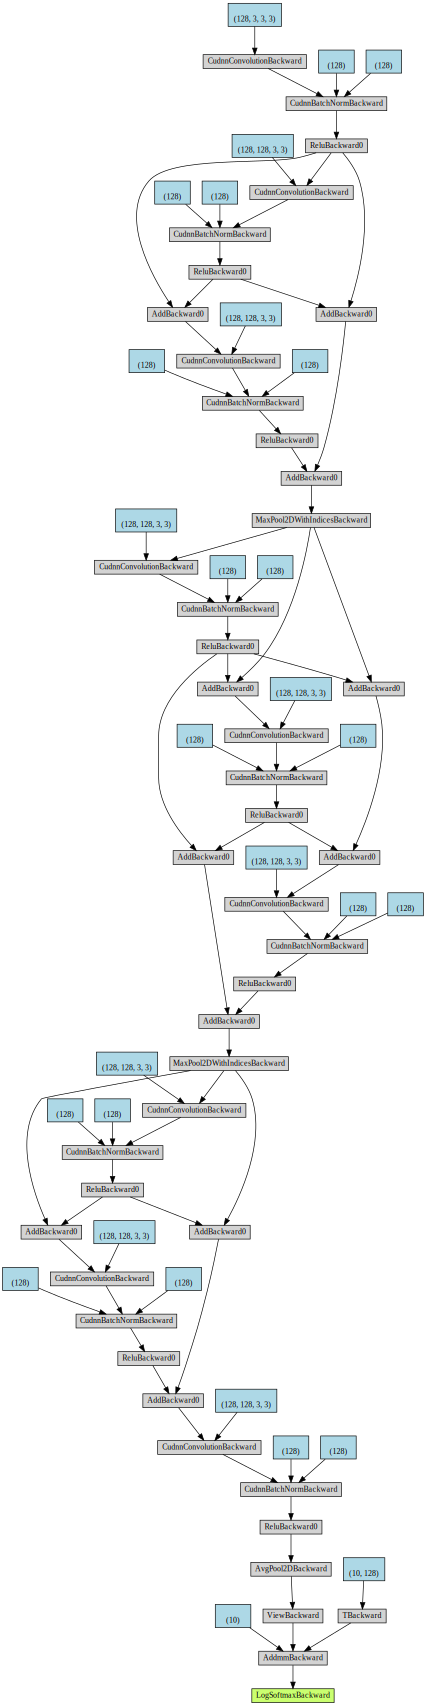

In [9]:
graphical_summary_cifar10(experiment.model)

In [10]:
experiment.run(epochs=25, momentum=0.9, lr=0.01, regularization=None, weight_decay=0.01)

TRAIN : epoch=0 train_loss=0.02289 correct/total=23181/50000 accuracy=46.36: 100%|██████████| 782/782 [00:34<00:00, 22.93it/s]
TEST :  epoch=0 test_loss=1.47216 correct/total=4603/10000 accuracy=46.03: 100%|██████████| 157/157 [00:02<00:00, 57.82it/s]
TRAIN : epoch=1 train_loss=0.01705 correct/total=30592/50000 accuracy=61.18: 100%|██████████| 782/782 [00:34<00:00, 22.70it/s]
TEST :  epoch=1 test_loss=1.47014 correct/total=5305/10000 accuracy=53.05: 100%|██████████| 157/157 [00:02<00:00, 57.97it/s]
TRAIN : epoch=2 train_loss=0.01460 correct/total=33600/50000 accuracy=67.20: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]
TEST :  epoch=2 test_loss=1.17789 correct/total=6315/10000 accuracy=63.15: 100%|██████████| 157/157 [00:02<00:00, 57.72it/s]
TRAIN : epoch=3 train_loss=0.01304 correct/total=35401/50000 accuracy=70.80: 100%|██████████| 782/782 [00:35<00:00, 21.87it/s]
TEST :  epoch=3 test_loss=1.57761 correct/total=5258/10000 accuracy=52.58: 100%|██████████| 157/157 [00:02<00:00, 56.

# Result
| Metric | Value |
| - | - |
| _Best train accuracy_| **88.37** |
| _Best test accuracy_| **87.76** |
| _Best epoch number_| **24** |
| _Parameter count_ | **1,186,698** |